In [1]:
from requests import get

# Using our custom url: titles from 2010-2018, sorted by votes decr
url = 'https://www.imdb.com/search/title?release_date=2010-01-01,2018-12-31&sort=num_votes,desc'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [2]:
from bs4 import BeautifulSoup

# converting our response into a beautiful soup data object!
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
# We have extracted the exact item that every movie is
# we will use bs findAll to extract each into a list
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
first_movie = movie_containers[0]
first_movie.find_all('span', {'name':'nv'})[1] # This contains the movies gross
first_gross = int(first_movie.find_all('span', {'name':'nv'})[1]['data-value'].replace(',', ''))
first_gross

292576195

In [5]:
# in the first movie, we will isolate the location of the movie title
first_movie = movie_containers[0]
first_name = first_movie.h3.a.text
print(first_name)

# Now we will extract the year of the movie
first_year = first_movie.find('span', {'class':'lister-item-year text-muted unbold'}).text
print(first_year)

# Lets now find rating
first_imdb = float(first_movie.strong.text)
print(first_imdb)

# And now collect metascrore
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

# collect # of votes 
first_votes = first_movie.find('span', attrs = {'name':'nv'})['data-value']
first_votes = int(first_votes)
print(first_votes)

Inception
(2010)
8.8
74
1824334


In [6]:
# the second title does not have a metacritic rating
second_movie_mscore = movie_containers[1].find('div', class_ = 'ratings-metascore')
type(second_movie_mscore)

NoneType

In [7]:
# So now, we can wrap this all up in a script to scrape the data
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
gross = []

for container in movie_containers:
    if container.find('div', class_ = 'ratings-metascore') is not None \
    and len(container.find_all('span', {'name':'nv'})) == 2:
        # The name
        name = container.h3.a.text
        names.append(name)
        
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
            
        #the gross
        grss = container.find_all('span', {'name':'nv'})[1]['data-value'].replace(',', '')
        gross.append(int(grss))

In [8]:
# We can now put everything into a Pandas dataframe
import pandas as pd

test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes,
                       'gross (usd)': gross
                       })
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
movie          46 non-null object
year           46 non-null object
imdb           46 non-null float64
metascore      46 non-null int64
votes          46 non-null int64
gross (usd)    46 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ KB
None


,movie,year,imdb,metascore,votes,gross (usd)
0,Inception,(2010),8.8,74,1824334,292576195
1,The Dark Knight Rises,(2012),8.4,78,1377079,448139099
2,Interstellar,(2014),8.6,74,1283630,188020017
3,Django Unchained,(2012),8.4,81,1200384,162805434
4,The Avengers,(2012),8.1,69,1170334,623357910
5,The Wolf of Wall Street,(2013),8.2,75,1025782,116900694
6,Shutter Island,(2010),8.1,63,997552,128012934
7,Guardians of the Galaxy,(2014),8.1,76,934121,333176600
8,Deadpool,(2016),8.0,65,812240,363070709
9,The Hunger Games,(2012),7.2,68,792105,408010692


In [9]:
# Before we create the scraping script,
# We also need to create a timer to prevent
# being banned (lmao)
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn
# warn("Warning Simulation")

start_time = time()
requests = 0
for _ in range(5):
    # A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.5542116464117476 requests/s


In [10]:
# Ok lets now start the script
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn

# Headers
headers = {"Accept-Language": "en-US, en;q=0.5"}

# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
gross = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0
start_no = [(i*50)+1 for i in range(44)]
# print(start_no)

for start in start_no:
    url = "https://www.imdb.com/search/title?release_date=2010-01-01,2018-12-31&sort=num_votes,desc&start=" \
            + str(start) + "&ref_=adv_nxt"
    
    response = get(url, headers=headers)
    
    # Pause the loop
    sleep(randint(8,15))
    
    # Monitor requests
    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    # Throw a warning for non-200 status codes
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
    
    if requests > 44:
        warn('Number of requests was greater than expected.')
        break
    
    # Parse the content of the request with BeautifulSoup
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    # Select all the 50 movie containers from a single page
    mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')
    
    for container in mv_containers:
        if container.find('div', class_ = 'ratings-metascore') is not None \
            and len(container.find_all('span', {'name':'nv'})) == 2:
            # The name
            name = container.h3.a.text
            names.append(name)

            # The year
            year = container.h3.find('span', class_ = 'lister-item-year').text
            years.append(year)

            # The IMDB rating
            imdb = float(container.strong.text)
            imdb_ratings.append(imdb)

            # The Metascore
            m_score = container.find('span', class_ = 'metascore').text
            metascores.append(int(m_score))

            # The number of votes
            vote = container.find('span', attrs = {'name':'nv'})['data-value']
            votes.append(int(vote))
            
            # Gross Box office
            grss = container.find_all('span', {'name':'nv'})[1]['data-value'].replace(',', '')
            gross.append(int(grss))

print("Scraping is done!\n")

Scraping is done!



In [11]:
# Store info into a dataframe
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes,
                              'gross (usd)': gross
                             })
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 6 columns):
movie          1522 non-null object
year           1522 non-null object
imdb           1522 non-null float64
metascore      1522 non-null int64
votes          1522 non-null int64
gross (usd)    1522 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 71.4+ KB
None


,movie,year,imdb,metascore,votes,gross (usd)
0,Inception,(2010),8.8,74,1824334,292576195
1,The Dark Knight Rises,(2012),8.4,78,1377079,448139099
2,Interstellar,(2014),8.6,74,1283630,188020017
3,Django Unchained,(2012),8.4,81,1200384,162805434
4,The Avengers,(2012),8.1,69,1170334,623357910
5,The Wolf of Wall Street,(2013),8.2,75,1025782,116900694
6,Shutter Island,(2010),8.1,63,997552,128012934
7,Guardians of the Galaxy,(2014),8.1,76,934121,333176600
8,Deadpool,(2016),8.0,65,812240,363070709
9,The Hunger Games,(2012),7.2,68,792105,408010692


In [12]:
# Cleaning the data once complete
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes', 'gross (usd)']]
movie_ratings.head()

# all unique yearsb we have different movies
# with string values and different styling
# lets strip to just the number
movie_ratings['year'].unique()
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)
movie_ratings['year'].head(3)

0    2010
1    2012
2    2014
Name: year, dtype: int64

In [13]:
# This will give us the min/max values for the imdb and metascore values
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,1.6,11.0
max,8.8,100.0


In [14]:
# we can add a new column to our df to match in the imdb
# score inline with the weighting of the metascore
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,gross (usd),n_imdb
0,Inception,2010,8.8,74,1824334,292576195,88.0
1,The Dark Knight Rises,2012,8.4,78,1377079,448139099,84.0
2,Interstellar,2014,8.6,74,1283630,188020017,86.0


In [15]:
# and now lets save the dataset to a csv file
movie_ratings.to_csv('movie_ratings.csv')

In [16]:
# Lets now create normalized graphs of the two scoring 
# methods: IMDB and Metascore
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# plt.show()
plt.savefig('imdb_metascore_normalized.png')


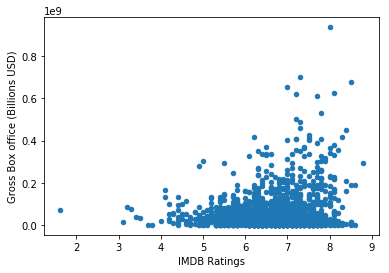

In [17]:
# Lets now create a scatterplot with IMDB scores along the x-axis
# and gross along the y-axis

imdb_ratings_plt = movie_ratings.plot.scatter(x='imdb', y='gross (usd)')
imdb_ratings_plt.set_xlabel("IMDB Ratings")
imdb_ratings_plt.set_ylabel("Gross Box office (Billions USD)")

imdb_ratings_plot = imdb_ratings_plt.get_figure()
imdb_ratings_plot.savefig('imdb_ratings_plot.jpg')

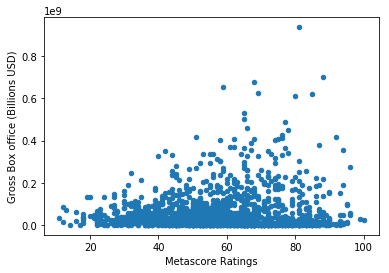

In [18]:
# The same as the previous but with Metascore instead
# plt.close('all')

meta_ratings_plt = movie_ratings.plot.scatter(x='metascore', y='gross (usd)')
meta_ratings_plt.set_xlabel("Metascore Ratings")
meta_ratings_plt.set_ylabel("Gross Box office (Billions USD)")

meta_ratings_plot = meta_ratings_plt.get_figure()
meta_ratings_plot.savefig('metascore_ratings_plot.jpg')